In [1]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Desktop\\DSP 19\\python DSP\\DSP datasets - python")

import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


# import libraries for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix

In [17]:
df = pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Retaining These Variables

- Survived - This variable is obviously relevant.
- Pclass   - Does a passenger's class on the boat affect their survivability?
- Sex      - Could a passenger's gender impact their survival rate?
- Age      - Does a person's age impact their survival rate?
- SibSp    - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probably
- Parch    - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probably
- Embarked - Does a person's point of embarkation matter?

In [19]:
# see distinct values in the Survived column
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
# see distinct values in the Sex column
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
#create the new dataframe abd assign the varibale to it
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['Embarked'] = df['Embarked']

In [23]:
X.head()

,sex,age,pclass,sibsp,parch,Embarked
0,male,22.0,3,1,0,S
1,female,38.0,1,1,0,C
2,female,26.0,3,0,0,S
3,female,35.0,1,1,0,S
4,male,35.0,3,0,0,S


In [24]:
y = df['Survived']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Check Missing Values

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are only 891 rows in the titanic data frame. Cabin is almost all missing values, so we can drop that variable completely
- Age seems like a relevant predictor for survival right? We'd want to keep the variables, but it has 177 missing values.

### Treating Missing Values in Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DD4B90128>]],
      dtype=object)

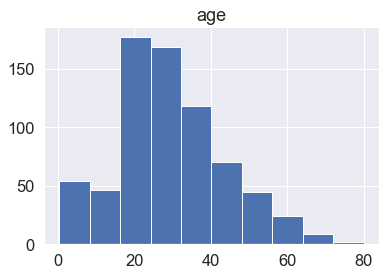

In [26]:
X.hist('age')

In [27]:
X['age'] = X['age'].fillna(X.age.median()) # because the hist is skewed
print (X.age.isnull().sum())

0


### Treating Missing Values in Embarked

In [14]:
print(X.Embarked.mode()[0])
X['Embarked'] = X['Embarked'].fillna(X.Embarked.mode()[0])
print (X.Embarked.isnull().sum())

S
0


### Sex column

In [28]:
print (X.sex[:5])
X['sex'] = pd.get_dummies(X.sex)['female']
print (X.sex[:5])

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object
0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: uint8


### Creating dummies for varibles Pclass

In [29]:
# see distinct values in the pclass column
X.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [30]:
display (X[:5])
X = X.join(pd.get_dummies(df.Pclass, prefix ='pclass'))
display (X[:5])

,sex,age,pclass,sibsp,parch,Embarked
0,0,22.0,3,1,0,S
1,1,38.0,1,1,0,C
2,1,26.0,3,0,0,S
3,1,35.0,1,1,0,S
4,0,35.0,3,0,0,S


,sex,age,pclass,sibsp,parch,Embarked,pclass_1,pclass_2,pclass_3
0,0,22.0,3,1,0,S,0,0,1
1,1,38.0,1,1,0,C,1,0,0
2,1,26.0,3,0,0,S,0,0,1
3,1,35.0,1,1,0,S,1,0,0
4,0,35.0,3,0,0,S,0,0,1


In [31]:
X = X.drop(['pclass_1', 'pclass'], axis=1)
display (X[:5])

,sex,age,sibsp,parch,Embarked,pclass_2,pclass_3
0,0,22.0,1,0,S,0,1
1,1,38.0,1,0,C,0,0
2,1,26.0,0,0,S,0,1
3,1,35.0,1,0,S,0,0
4,0,35.0,0,0,S,0,1


### Creating dummies for varibles Embarked

In [32]:
X = X.join(pd.get_dummies(df.Embarked, prefix ='Embarked'))
display (X[:5])

,sex,age,sibsp,parch,Embarked,pclass_2,pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,S,0,1,0,0,1
1,1,38.0,1,0,C,0,0,1,0,0
2,1,26.0,0,0,S,0,1,0,0,1
3,1,35.0,1,0,S,0,0,0,0,1
4,0,35.0,0,0,S,0,1,0,0,1


In [33]:
X = X.drop(['Embarked_C', 'Embarked'], axis=1)
display (X[:5])

,sex,age,sibsp,parch,pclass_2,pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,0,1
1,1,38.0,1,0,0,0,0,0
2,1,26.0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,1


### Standardizing Age variable

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
display (X[:5])
X.age = scaler.fit_transform(X[['age']])
display (X[:5])

,sex,age,sibsp,parch,pclass_2,pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,0,1
1,1,38.0,1,0,0,0,0,0
2,1,26.0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,1


,sex,age,sibsp,parch,pclass_2,pclass_3,Embarked_Q,Embarked_S
0,0,-0.565736,1,0,0,1,0,1
1,1,0.663861,1,0,0,0,0,0
2,1,-0.258337,0,0,0,1,0,1
3,1,0.433312,1,0,0,0,0,1
4,0,0.433312,0,0,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DD4B9B128>]],
      dtype=object)

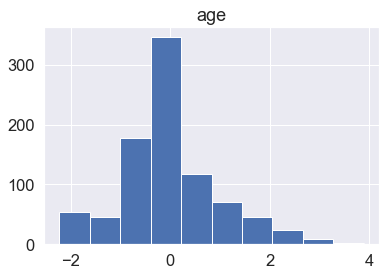

In [35]:
X.hist('age')

**Encoding the categorical variables and Standardizing the Continuous Variables are Hygiene Steps**

# Model Building

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [37]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [38]:
from sklearn.linear_model import LogisticRegression

# fit the model to the training data
model=LogisticRegression()
model.fit(X_train,y_train)

print (model.intercept_)
print (model.coef_)
print (X_train.columns)


[0.16895636]
[[ 2.56939259 -0.36361616 -0.26361411 -0.07520945 -0.57435637 -1.84009514
  -0.1786976  -0.5393869 ]]
Index(['sex', 'age', 'sibsp', 'parch', 'pclass_2', 'pclass_3', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Interpretation of Model Equation

- Log_odds (Survival)
- Sex - +ve - prob of female survival is higher
- Age - -ve - lower the age survival is higher
- Sibsp - -ve
- Parch - -ve
- Pclass_2 - -ve
- Pclass_3 - -ve
- Embarked_Q - -ve
- Embarked_S - -ve

In [39]:
# A female in Pclass_1 with Age 0.2 and Embarked_C
log_odds = 0.16895636 + 2.56939259*1 - 0.36361616*(0.2) - 0.26361411*0 - 0.07520945*0 - 0.57435637*0 - 1.84009514*0 - 0.1786976*0  - 0.5393869*0
log_odds

2.6656257180000003

In [40]:
import numpy as np
p = np.exp(log_odds)/(1+np.exp(log_odds))
p

0.9349675664950983

In [41]:
# A male in Pclass_1 with Age 0.2 and Embarked_C
log_odds = 0.16895636 + 2.56939259*0 - 0.36361616*(0.2) - 0.26361411*0 - 0.07520945*0 - 0.57435637*0 - 1.84009514*0 - 0.1786976*0  - 0.5393869*0
# log_odds
p = np.exp(log_odds)/(1+np.exp(log_odds))
p

0.5240397325700105

# Prediction

In [29]:
display (X_test[:10])
print ()
display (model.predict_proba(X_test)[:10]) # prob
print ()
display (model.predict(X_test)[:10]) # classification

,sex,age,sibsp,parch,pclass_2,pclass_3,Embarked_Q,Embarked_S
709,0,-0.104637,1,1,0,1,0,0
439,0,0.125912,0,0,1,0,0,1
840,0,-0.719436,0,0,0,1,0,1
720,1,-1.795334,0,1,1,0,0,1
39,1,-1.180535,1,0,0,1,0,0
290,1,-0.258337,0,0,0,0,0,1
300,1,-0.104637,0,0,0,1,1,0
333,0,-1.026836,2,0,0,1,0,1
208,1,-1.026836,0,0,0,1,1,0
136,1,-0.796286,0,2,0,0,0,1


array([[0.8778166 , 0.1221834 ],
       [0.72920061, 0.27079939],
       [0.8753296 , 0.1246704 ],
       [0.09955232, 0.90044768],
       [0.2565646 , 0.7434354 ],
       [0.09171289, 0.90828711],
       [0.31916668, 0.68083332],
       [0.91407045, 0.08592955],
       [0.2510669 , 0.7489331 ],
       [0.08801746, 0.91198254]])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [42]:
# compute the accuracy of our predictions
from sklearn.metrics import accuracy_score
print ("Logistic testing accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic testing accuracy is 0.80


In [43]:
print ("Logistic training accuracy is %2.2f" % accuracy_score(y_train,model.predict(X_train)))

Logistic training accuracy is 0.81


<h2>ROC Curve</h2>

In [32]:
from sklearn.metrics import roc_auc_score
# lets measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, model.predict(X_test)) 
logistic_roc_auc

0.7934362934362935

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

In [34]:
model.predict_proba(X_test)[:,1][:5] # P(Y=1)

array([0.1221834 , 0.27079939, 0.1246704 , 0.90044768, 0.7434354 ])

In [35]:
display (thresholds[:10])
display (fpr[:10])
display (tpr[:10])

array([1.94233123, 0.94233123, 0.94071463, 0.93822605, 0.93490648,
       0.92503309, 0.88148848, 0.87797539, 0.80203142, 0.79894565])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01904762])

array([0.        , 0.01351351, 0.04054054, 0.06756757, 0.08108108,
       0.12162162, 0.27027027, 0.2972973 , 0.41891892, 0.41891892])

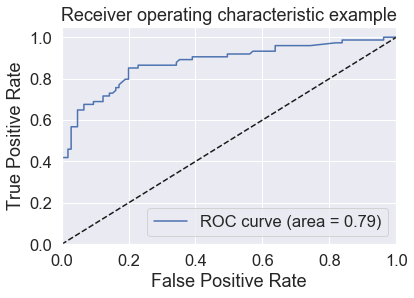

Logistic AUC = 0.79 


In [36]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()
print("Logistic AUC = %2.2f " % logistic_roc_auc )

<h1 style="color:green">The overall Logistic AUC for this model is 0.79</h1>